### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.medium_test()

### Exact solution

[Qibo 0.2.7|INFO|2024-05-30 10:07:26]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-30 10:07:26]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-30 10:07:26]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Best feasible profit: 207
Minimum energy: -272.926
Minimum energy without offset: -585.8504999999996
s = 0 : [(-1.0000000000000007+0j), (-0.5000000000000001+0j)]
s = 1 : [(-0.9231400173300828+0j), (-0.5604849782412533+0j)]
s = 2 : [(-0.8834893206029588+0j), (-0.6280531835908285+0j)]
s = 3 : [(-0.8753458746829291+0j), (-0.7002519021314872+0j)]
s = 4 : [(-0.901549437156153+0j), (-0.7710032190300972+0j)]
s = 5 : [(-0.9668283465678089+0j), (-0.836284793395992+0j)]
s = 6 : [(-1.0626546796479348+0j), (-0.9090170840263706+0j)]
s = 7 : [(-1.1781720934069668+0j), (-1.0027824624817359+0j)]
s = 8 : [(-1.309113130774856+0j), (-1.1164276196286127+0j)]
s = 9 : [(-1.453659984895693+0j), (-1.2430797698430132+0j)]
s = 10 : [(-1.6097270459191522+0j), (-1.3778094981645534+0j)]


c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


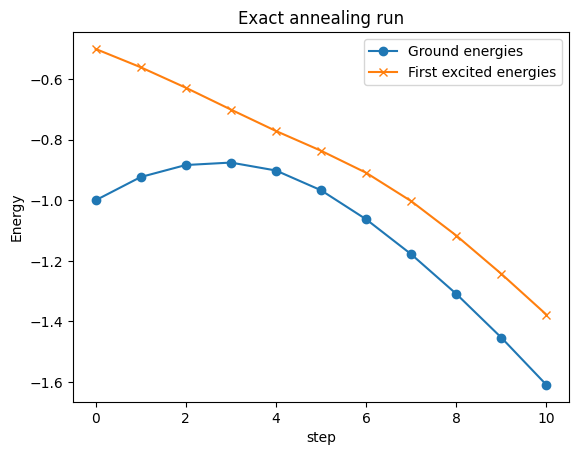

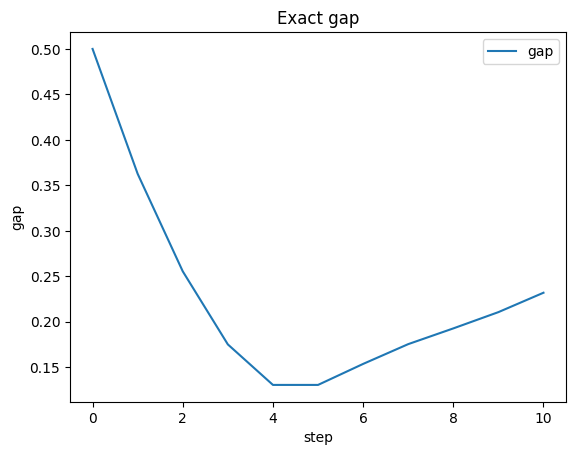

estimated minimum gap:  (0.13054355317181687+0j)


In [2]:
from exact_solver import Exact_solver

exact_solver = Exact_solver(W_capacity, weights, values)

best_feasible_profit, minimum_energy = exact_solver.run()

print(f'Best feasible profit: {best_feasible_profit}')
print(f'Minimum energy: {minimum_energy}')
print(f'Minimum energy without offset: {minimum_energy - exact_solver.offset}')


exact_solver.annealing_run(10)

### DMRG

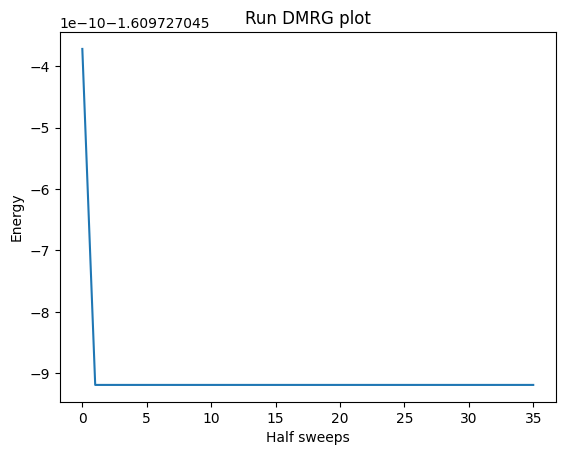

Solution energy = -1.6097270459191522 + 312.9244999999996 (offset) = 311.31477295408047
-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


In [3]:
from dmrg_solver import DMRG_solver

chi = 32
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)

numsweeps = 6 # number of DMRG sweeps
qkp_DMRG.run(numsweeps)

qkp_DMRG.show_solution()


 ---- s= 0  ----


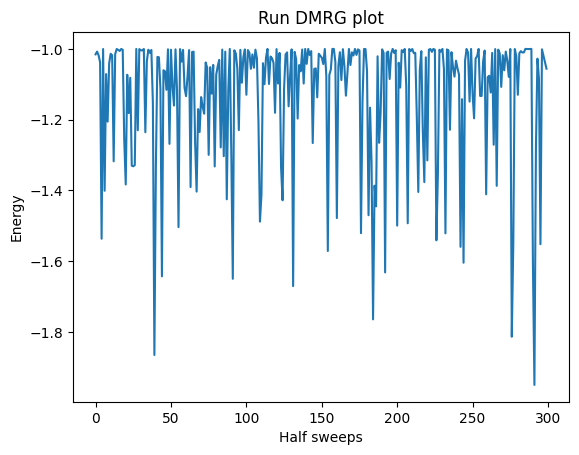

Solution energy = -1.0558087899765423 + 312.9244999999996 (offset) = 311.8686912100231


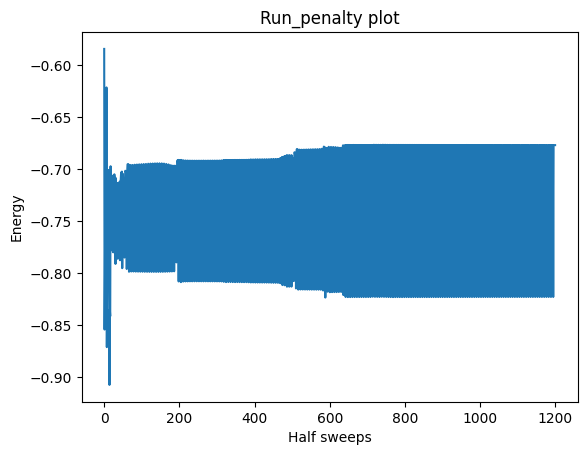

DMRG gap: [-1.0558087899765423, -0.6770831573268911]
Real gap:  [-1.0, -0.5000000000000008]
 ---- s= 1  ----


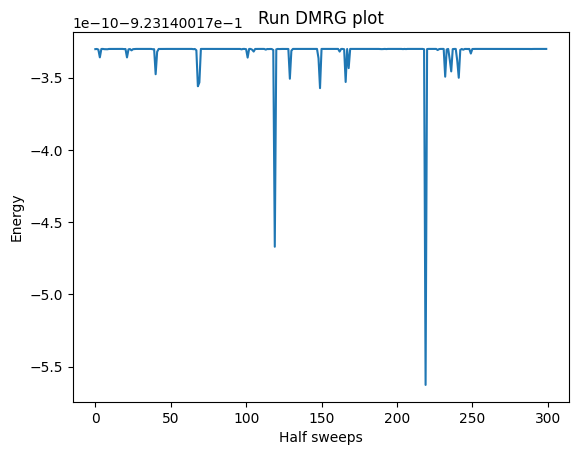

Solution energy = -0.9231400173300806 + 312.9244999999996 (offset) = 312.00135998266956


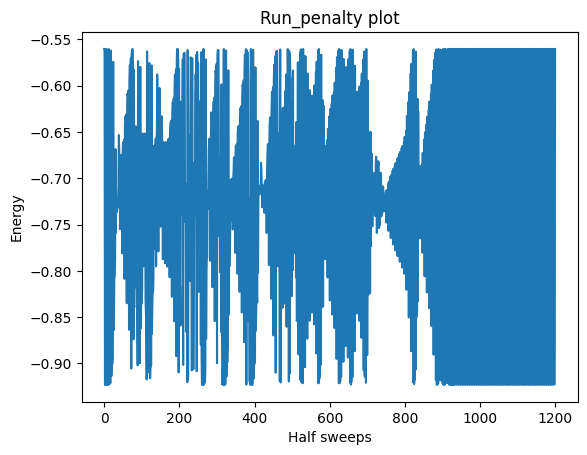

DMRG gap: [-0.9231400173300806, -0.5605614332823325]
Real gap:  [-0.92314001733008, -0.5604849782412561]
 ---- s= 2  ----


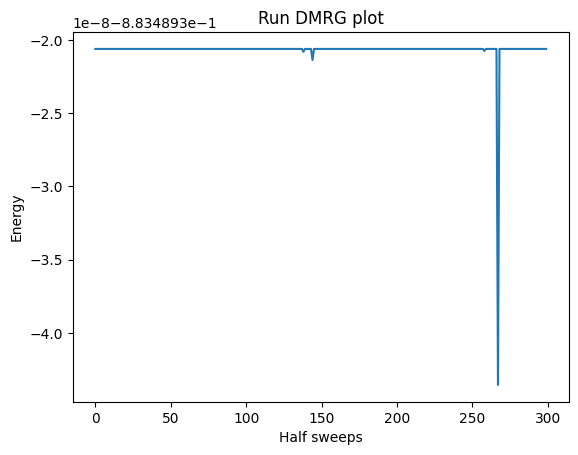

Solution energy = -0.8834893206029601 + 312.9244999999996 (offset) = 312.04101067939666


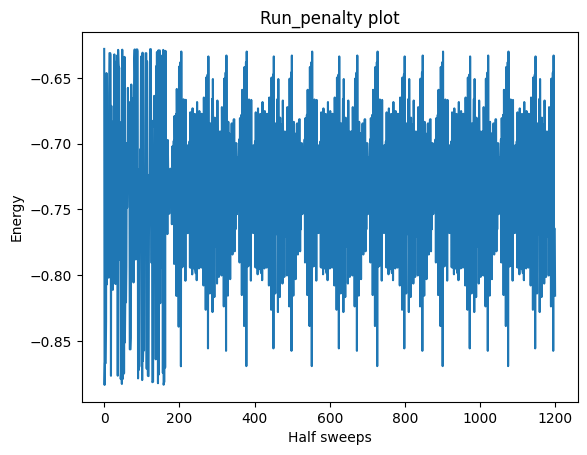

DMRG gap: [-0.8834893206029601, -0.8155981708200136]
Real gap:  [-0.8834893206029594, -0.6280531835908295]
 ---- s= 3  ----


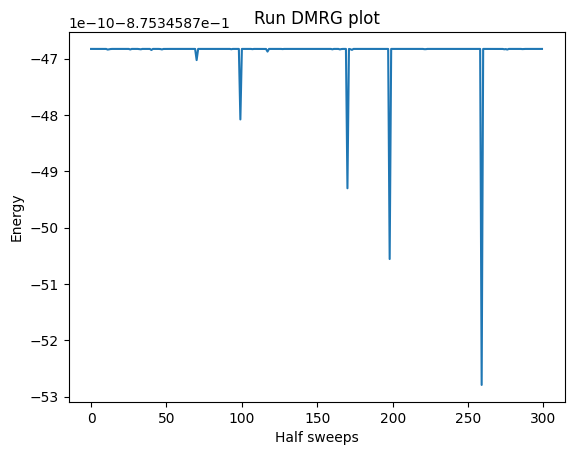

Solution energy = -0.875345874682929 + 312.9244999999996 (offset) = 312.0491541253167


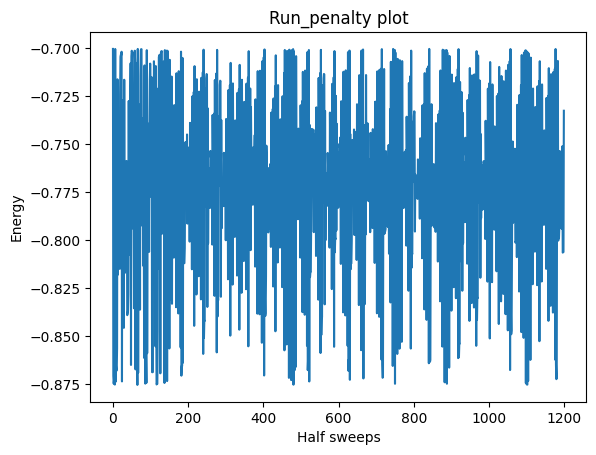

DMRG gap: [-0.875345874682929, -0.7324635715949728]
Real gap:  [-0.875345874682929, -0.7002519021314884]
 ---- s= 4  ----


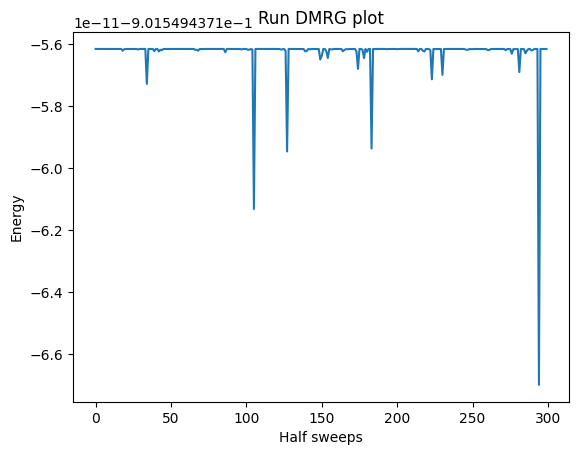

Solution energy = -0.9015494371561539 + 312.9244999999996 (offset) = 312.02295056284345


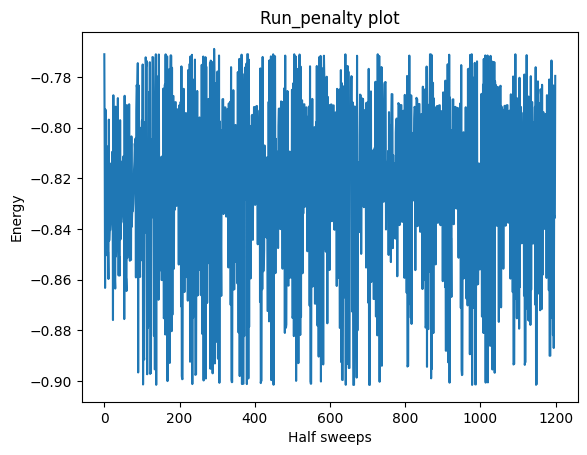

DMRG gap: [-0.9015494371561539, -0.779555610616295]
Real gap:  [-0.9015494371561541, -0.7710032190300955]
 ---- s= 5  ----


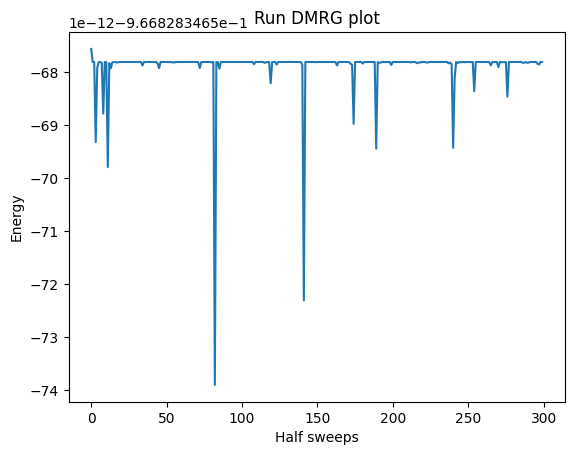

Solution energy = -0.9668283465678102 + 312.9244999999996 (offset) = 311.9576716534318


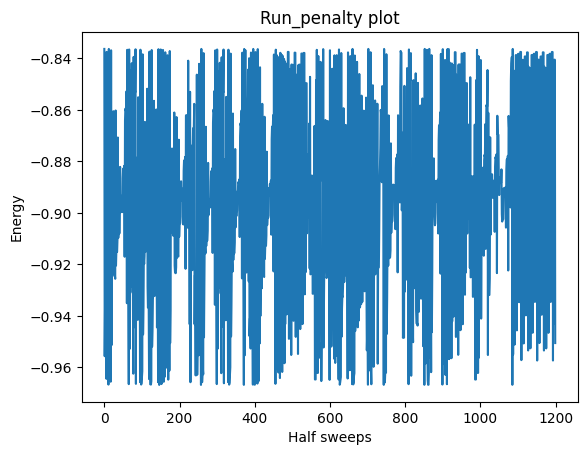

DMRG gap: [-0.9668283465678102, -0.9505620973988856]
Real gap:  [-0.9668283465678114, -0.8362847933959915]
 ---- s= 6  ----


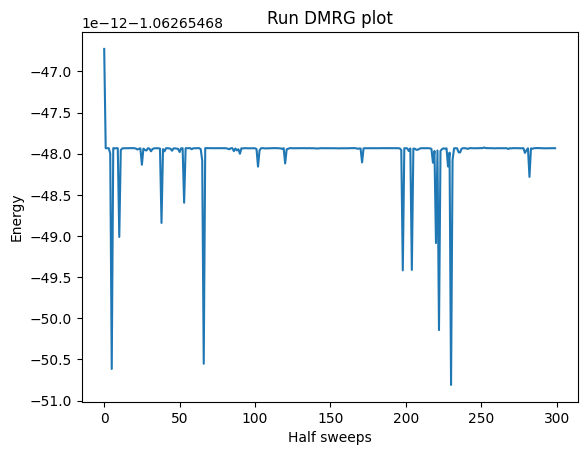

Solution energy = -1.0626546796479341 + 312.9244999999996 (offset) = 311.8618453203517


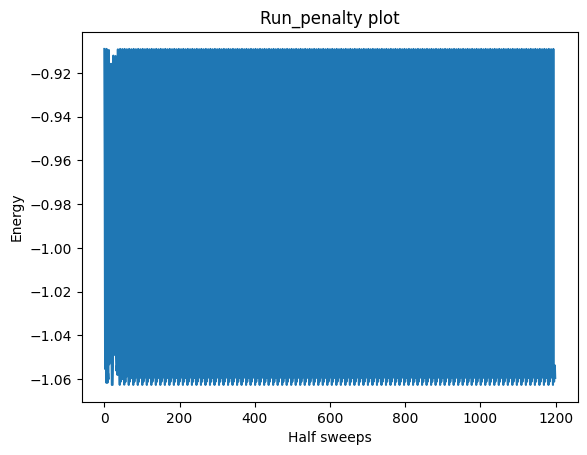

DMRG gap: [-1.0626546796479341, -1.0594627338738445]
Real gap:  [-1.0626546796479357, -0.9090170840263703]
 ---- s= 7  ----


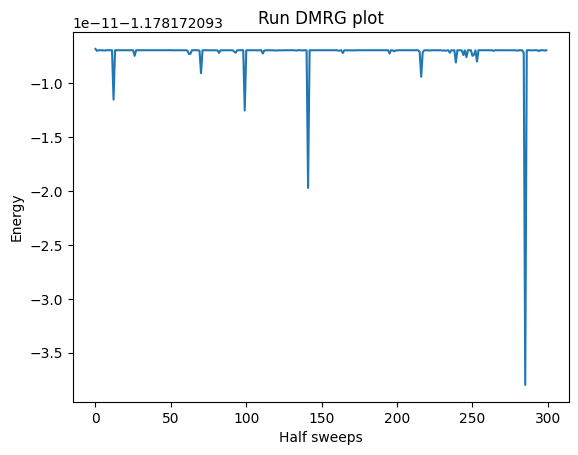

Solution energy = -1.1781720934069717 + 312.9244999999996 (offset) = 311.7463279065926


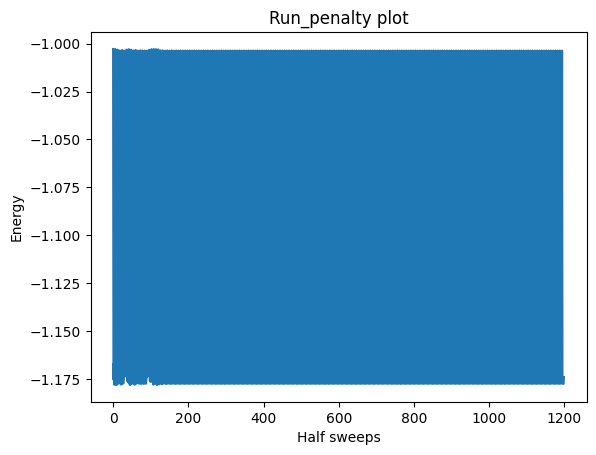

DMRG gap: [-1.1781720934069717, -1.174044988487795]
Real gap:  [-1.1781720934069728, -1.0027824624817363]
 ---- s= 8  ----


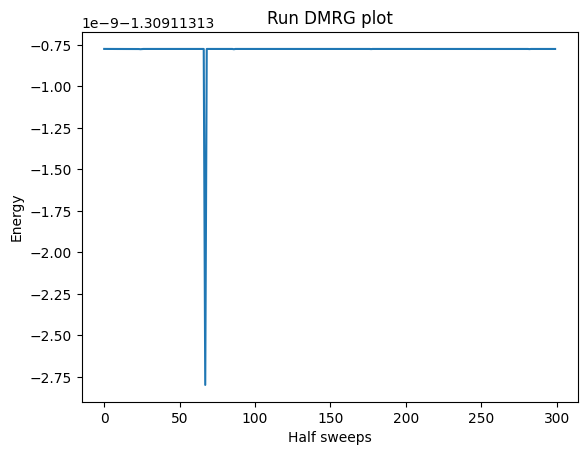

Solution energy = -1.309113130774892 + 312.9244999999996 (offset) = 311.6153868692247


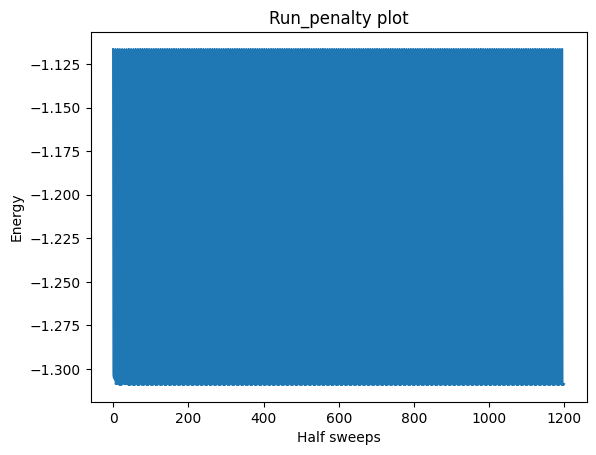

DMRG gap: [-1.309113130774892, -1.3085779028531133]
Real gap:  [-1.3091131307748551, -1.1164276196286145]
 ---- s= 9  ----


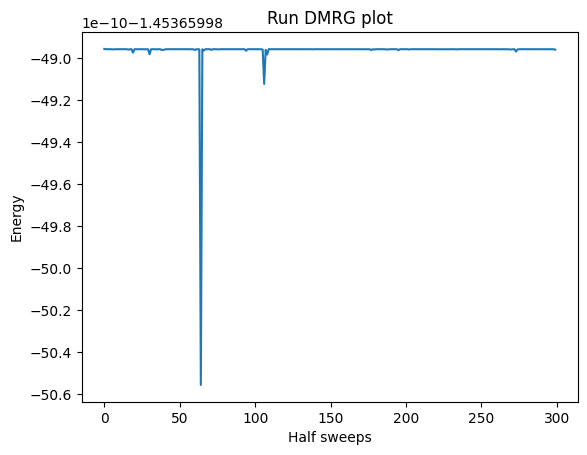

Solution energy = -1.453659984895913 + 312.9244999999996 (offset) = 311.4708400151037


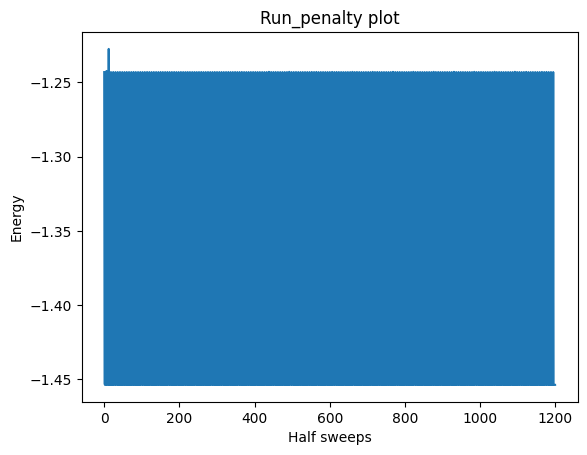

DMRG gap: [-1.453659984895913, -1.4536341776977495]
Real gap:  [-1.453659984895694, -1.243079769843013]
 ---- s= 10  ----


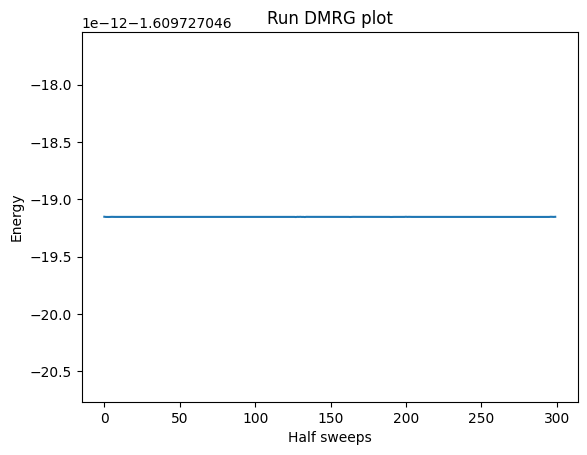

Solution energy = -1.6097270459191517 + 312.9244999999996 (offset) = 311.31477295408047


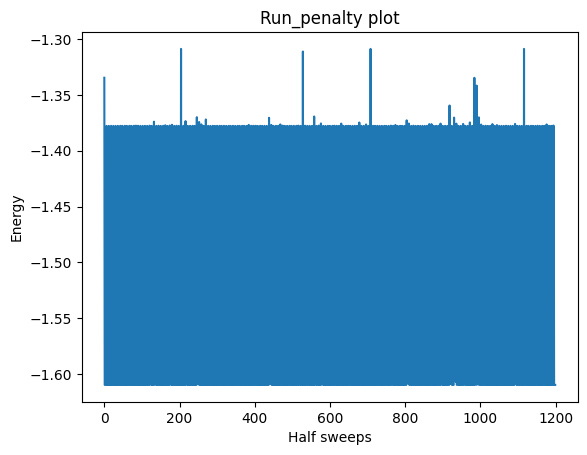

DMRG gap: [-1.6097270459191517, -1.6097009504117858]
Real gap:  [-1.6097270459191522, -1.3778094981645532]


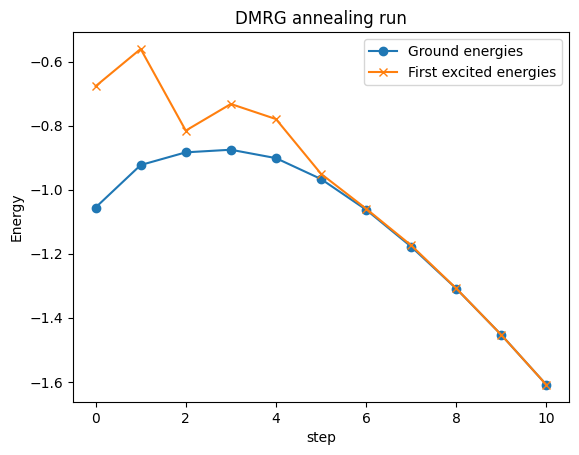

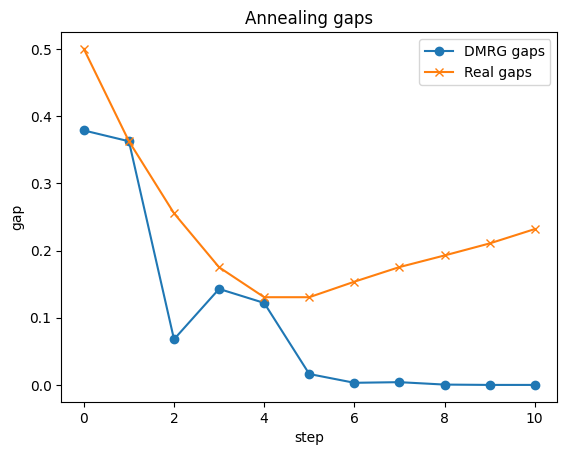

In [4]:
qkp_DMRG.annealing_run()